/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


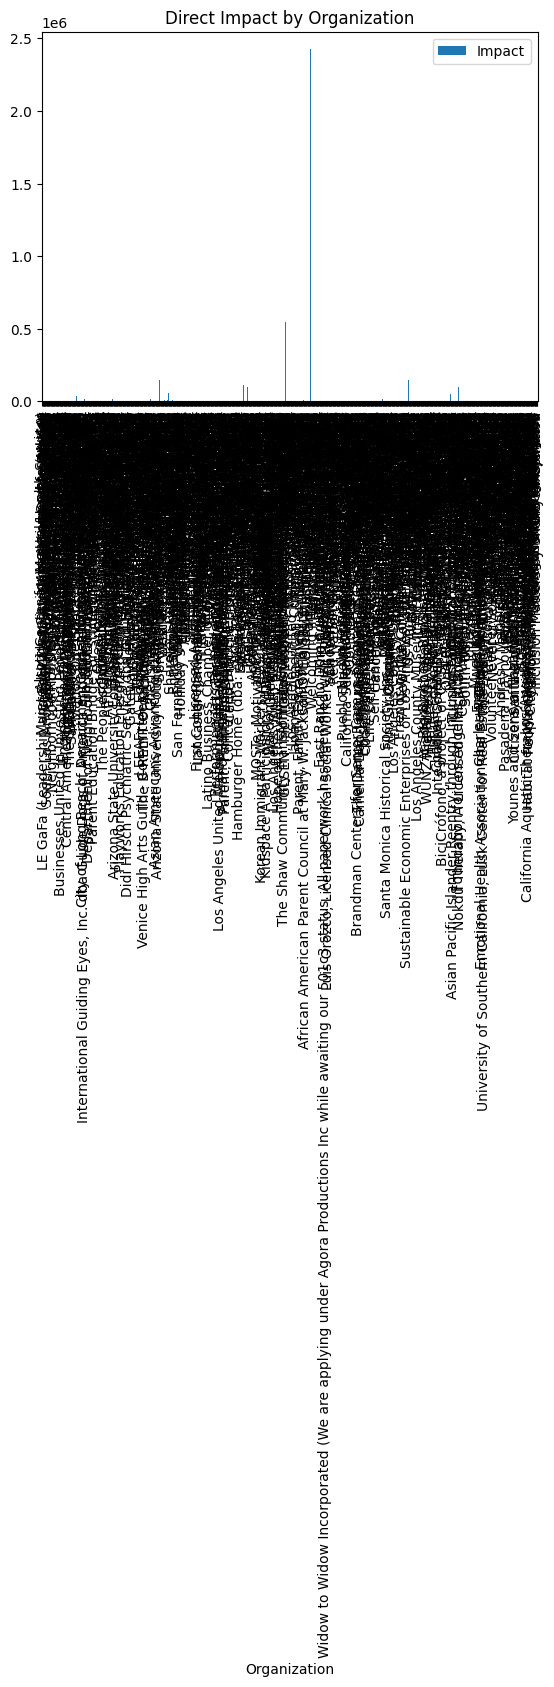

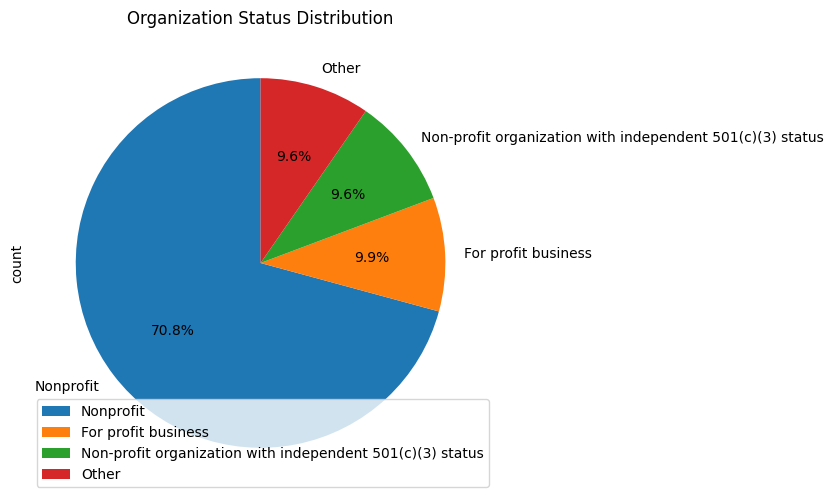

                                               Title  \
0        Mental Health & Supportive Housing Services   
1  Enhancing Social Support Networks Through CHWs...   
2  Reunification of Reducing Homelessness in L.A....   
3  I Am Samoan Enough: Combatting Poverty Amongst...   
4                Working Together to Help Each Other   

                                                Slug  Year  \
0     2024/mental-health-supportive-housing-services  2024   
1  2024/enhancing-social-support-networks-through...  2024   
2  2024/reunification-of-reducing-homelessness-in...  2024   
3  2024/i-am-samoan-enough:-combatting-poverty-am...  2024   
4           2024/working-together-to-help-each-other  2024   

                                        Organization  \
0           Alcott Center for Mental Health Services   
1        Mujeres Unidas Sirviendo Activamente (MUSA)   
2                           Miracle of God foundaion   
3  LE GaFa (Leadership and Education through Gaga...   
4         

In [2]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import os
#from elasticsearch import Elasticsearch
from IPython.display import display
with open(r'/Org_data.json',encoding='utf-8') as p:
    Org_data = json.load(p)
with open(r'/data_2024.json',encoding='utf-8') as f:
    data_2024 = json.load(f)


# Use pd.json_normalize to convert the JSON to a DataFrame
df_org = pd.json_normalize(Org_data)
#df = pd.json_normalize(data)
df_24 = pd.json_normalize(data_2024)

# Rename the columns for clarity
#df_24.columns = ['Title', 'Slug','Year', 'Organization', 'Description', 'Goal','Ranking', 'Mission Statement', 'Progression','End Goal','Quota', 'Support Statement', 'Project' ,'Impact','Location','Collaborations', 'Companies']
df_24.columns = ['Title', 'Slug', 'Year', 'Organization', 'Description', 'Goal', 'Ranking', 'Progression', 'Mission Statement', 'End Goal', 'Quota', 'Support Statement', 'Project', 'Impact', 'Collaborations']
df_org.columns = ['Slug', 'Status', 'Website', 'Instagram', 'Twitter', 'FaceBook', 'Newsletter', 'Title', 'IRS Standing', 'Zipcode', 'Volunteer', 'Summary', 'Category']
df_24 = df_24.drop(['Ranking'], axis=1)
#df_24 = df_24.fillna('N/A')
df_24 = df_24.fillna('Working Individually')
df_org = df_org.fillna('N/A')



def extract_direct_impact(text):
    match = re.search(r'Direct Impact: ([\d,]+\.?\d*)', text)
    if match:
        return float(match.group(1).replace(',', ''))  # Remove commas and convert to float
    return None

df_24['Impact'] = df_24['Impact'].apply(extract_direct_impact)
df_org = df_org.drop_duplicates(subset='Title')
final_List= df_24.merge(df_org , left_on='Organization', right_on= 'Title', how='inner')
final_List = final_List.drop(['Slug_y', 'Title_y'],axis = 1)
final_List = final_List.fillna(0)
  
df_24.plot(kind='bar', x='Organization', y='Impact', title='Direct Impact by Organization')
plt.show()


# Combine categories with less than 5% into "Other"
threshold = 0.05  # Define threshold for small categories
status_counts = df_org['Status'].value_counts(normalize=True)
df_org['Status'] = df_org['Status'].apply(lambda x: 'Other' if status_counts[x] < threshold else x)

# Plot with the new grouped categories
plt.figure(figsize=(10, 6))
df_org['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, title='Organization Status Distribution')
plt.show()

print(df_24.head())
